In [61]:
# 2D random variable (X, Y): covariance matrix

from scipy.stats import rv_discrete
import numpy as np

x = [1, 2, 3]
y = [1, 4, 9]

# joint distribution
dist_xy = np.array([[0.15, 0.02, 0.02], 
           [0.04, 0.45, 0.03],
          [0.01, 0.03, 0.25]])
print(np.sum(dist_xy)) # should be 1

# X: marginal distribution
dist_x = [sum(dist_xy[0]), sum(dist_xy[1]), sum(dist_xy[2])]
print(dist_x)
# print(sum(dist_x))
rv_x = rv_discrete(values = (x, dist_x))
mean_x = rv_x.mean()
x_centered = x - mean_x
# variance
var_x = 0
for i in range(3):
    var_x = var_x + x_centered[i]**2 * dist_x[i]


# standard deviation
sigma_x = np.sqrt(var_x)
print(sigma_x)


# Y: marginal distribution
transp_dist_xy = dist_xy.transpose()

dist_y = [sum(transp_dist_xy[0]), sum(transp_dist_xy[1]), sum(transp_dist_xy[2])]
print(dist_y)
# print(sum(dist_y))
rv_y = rv_discrete(values = (y, dist_y))
mean_y = rv_y.mean()
y_centered = y - mean_y
# variance
var_y = 0
for i in range(3):
    var_y = var_y + y_centered[i]**2 * dist_y[i]


# standard deviation
sigma_y = np.sqrt(var_y)
print(sigma_y)

xy = np.outer(x_centered, y_centered)
print(xy)

# covariance
cov = 0
for i in range(3):
    for j in range(3):
        cov = cov + xy[i][j] * dist_xy[i][j]

print(cov)

cov_matr = [[sigma_x, cov],
           [cov, sigma_y]]

for i in range(2): 
    print(np.round(cov_matr[i], 2))

1.0
[0.18999999999999997, 0.52, 0.29]
0.6855654600401044
[0.2, 0.5, 0.3]
2.9137604568666933
[[ 4.29  0.99 -4.51]
 [ 0.39  0.09 -0.41]
 [-3.51 -0.81  3.69]]
1.48
[0.69 1.48]
[1.48 2.91]


[[0.78947368 0.10526316 0.10526316]
 [0.07692308 0.86538462 0.05769231]
 [0.03448276 0.10344828 0.86206897]]
[2.15789474 4.05769231 8.20689655]


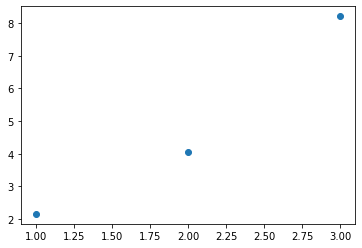

In [60]:
# conditional distribution and conditional expectation

import matplotlib.pyplot as plt

# conditional distribution of Y given X

p_y_given_x = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        p_y_given_x[i][j] = dist_xy[i][j]/dist_x[i]

        
print(p_y_given_x)
# print(sum(p_y_given_x[0])) # should be 1



# conditional expectation of Y given X
e_y_given_x = np.dot(p_y_given_x, y)
print(e_y_given_x)

plt.plot(x, e_y_given_x, 'o')
plt.show()